In [1]:
import numpy as np
import matplotlib.pyplot as plt                 #For plotting
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf
from pyliso import plotTF, plotTFs
figlist = []
#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                           
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'lines.linewidth': 2.0}
pylab.rcParams.update(params)
#********************************************************************************************************
mList = ['o','v','^','<','>','s','p','*','H','+','X','D']
cList = ['#0072b2','#009e73','#d55e00','#cc79a7','#56b4e9'] #5
lsList = ['-','--','-.',':']  #4
from scipy.optimize import curve_fit

In [2]:
data = np.loadtxt('VacCanTempInLoop_19-08-2019_142233.txt')

In [3]:
def expDecay(x, a, b, c):
    return a * np.exp(-x/(b*3600)) + c

In [4]:
ts = data[20000:330000, 0] - data[10000, 0]
temp = data[20000:330000, 1]
popt, pcov = curve_fit(expDecay, ts, temp, bounds=([8.0, 2.0, 24.5], [10.0, 3.0, 26.5]))
labelTuple = (popt[0], np.sqrt(pcov[0,0]), popt[1], np.sqrt(pcov[1,1]), popt[2], np.sqrt(pcov[2,2]))

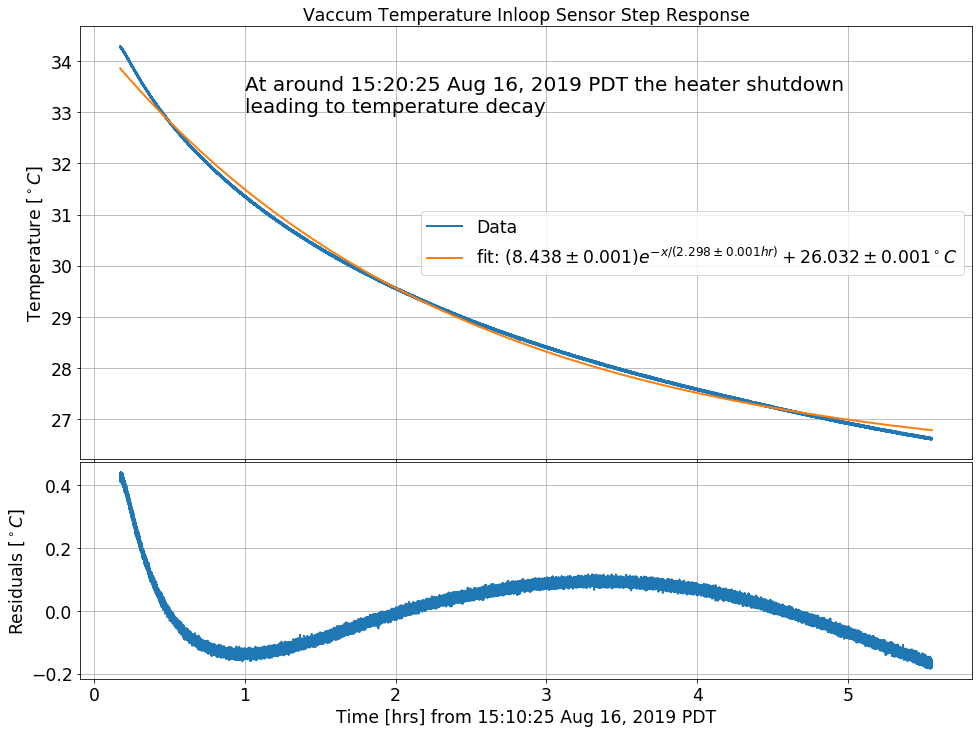

In [5]:
fig = plt.figure(figsize=[16, 12])
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 0.5], hspace=0.01)
ax = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax)
ax.plot(ts/3600, temp, label = 'Data')
ax.plot(ts/3600, expDecay(ts, *popt),
         label='fit: ($%5.3f \pm %5.3f)e^{-x/(%5.3f \pm %5.3fhr)} +%5.3f \pm %5.3f ^\circ C$' % labelTuple)
ax2.plot(ts/3600, temp - expDecay(ts, *popt))
ax.set_title('Vaccum Temperature Inloop Sensor Step Response')
ax2.set_xlabel('Time [hrs] from 15:10:25 Aug 16, 2019 PDT')
ax.set_ylabel(r'Temperature [$^\circ C$]')
ax2.set_ylabel('Residuals [$^\circ C$]')
ax.text(1, 33,
        'At around 15:20:25 Aug 16, 2019 PDT the heater shutdown\nleading to temperature decay',
        fontsize=20)
ax.grid()
ax2.grid()
ax.legend(loc=5)
figlist += [fig]

In [6]:
pp = PdfPages('VacCanInloopTempDecayFit.pdf')
for fig in figlist:
    pp.savefig(fig,bbox_inches='tight')
pp.close()